## Notebook to annotate PBMC3K datasets from 10xGenomics using exCellxgene (and scanpy)

Note. This annotation was originally done in scanpy pbmc3k tutorial (link: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html). To use this as an example dataset for the "how to do cell-type annotation" manuscript, we will use (ex)CELLxGENE to curate the annotations using the same marker genes. 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns



In [30]:
adata_test = sc.datasets.pbmc3k()
adata_test.var

,gene_ids
index,
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180


In [3]:
adata = sc.datasets.pbmc3k_processed()
adata

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
adata.obs["louvain"]

index
AAACATACAACCAC-1        CD4 T cells
AAACATTGAGCTAC-1            B cells
AAACATTGATCAGC-1        CD4 T cells
AAACCGTGCTTCCG-1    CD14+ Monocytes
AAACCGTGTATGCG-1           NK cells
                         ...       
TTTCGAACTCTCAT-1    CD14+ Monocytes
TTTCTACTGAGGCA-1            B cells
TTTCTACTTCCTCG-1            B cells
TTTGCATGAGAGGC-1            B cells
TTTGCATGCCTCAC-1        CD4 T cells
Name: louvain, Length: 2638, dtype: category
Categories (8, object): ['CD4 T cells', 'CD14+ Monocytes', 'B cells', 'CD8 T cells', 'NK cells', 'FCGR3A+ Monocytes', 'Dendritic cells', 'Megakaryocytes']

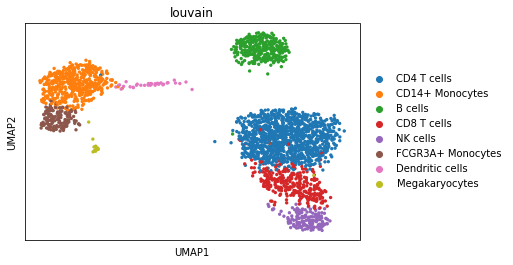

In [6]:
sc.pl.umap(adata, color="louvain")

### marker genes from the scanpy PBMC3K tutorial

- Louvain Group	Markers	Cell Type
- 0	IL7R	CD4 T cells
- 1	CD14, LYZ	CD14+ Monocytes
- 2	MS4A1	B cells
- 3	CD8A	CD8 T cells
- 4	GNLY, NKG7	NK cells
- 5	FCGR3A, MS4A7	FCGR3A+ Monocytes
- 6	FCER1A, CST3	Dendritic Cells
- 7	PPBP	Megakaryocytes


In [7]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [12]:
marker_genes_dict = {"CD4 T cells":["IL7R"],
                     "CD14+ Monocytes":["CD14","LYZ"],
                     "B cells":["MS25A1"],
                     "CD8 T cells":["CD8A"],
                     "NK cells":["GNLY","NKG7"],
                     "Monocytes":["FCGR3A","MS4A7"],
                     "Dendritic cells":["FCER1A","CST3"],
                     "Megakarytocytes":["PPBP"]}

In [16]:
marker_genes_dict["CD4 T cells"]

['IL7R']

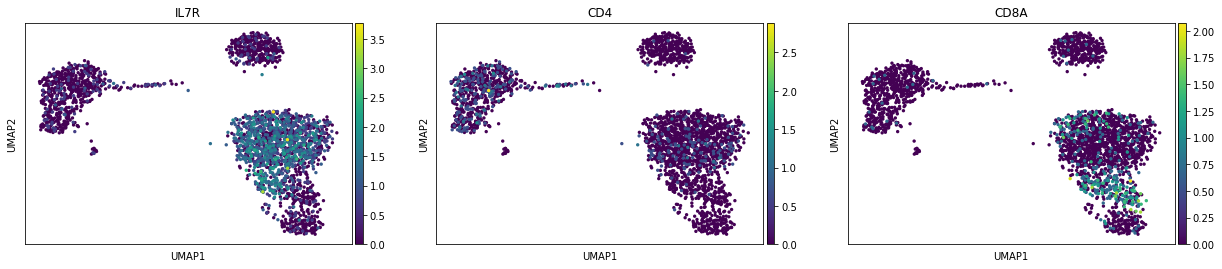

In [26]:
sc.pl.umap(adata, color = ["IL7R","CD4","CD8A"])

In [34]:
# Since the anndata is in a reduced format, we'll need to recover the adata.raw 
# as most of the marker genes were missing from the adata.
adata_test2 = adata.raw.to_adata()
adata_test2

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'

### Move to exCELLxGENE to see how much we can curate the annotation above, especially on the noisy cells that spread over to the other clusters.

In [35]:
adata_test2.write_h5ad("/mnt/ibm_lg/yangjoon.kim/excellxgene_tutorial_manuscript/data/pbmc3k/pbmc3k_processed_scanpy.h5ad")